In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ibm_db
import ibm_db_dbi

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
dsn_hostname = os.environ["HOST_NAME"]
dsn_uid = os.environ["USERNAME"]
dsn_pwd = os.environ["PASSWORD"]

dsn_driver = os.environ["DSN_DRIVER"]
dsn_database = os.environ["DB_NAME"]
dsn_port = os.environ["PORT"]
dsn_protocol = os.environ["DSN_PROTOCOL"]

In [3]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=jts01551;PWD=67sk^vschz4h148z;


In [5]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  jts01551 on host:  dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net


In [7]:
stmt = ibm_db.exec_immediate(conn, "SELECT count(*) FROM MCDONALDS")

ibm_db.fetch_both(stmt)

{'1': '260', 0: '260'}

In [11]:
pconn = ibm_db_dbi.Connection(conn)
df = pd.read_sql("SELECT * FROM MCDONALDS", pconn)
df.head()

,CATEGORY,ITEM_NAME,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT_DAILY_VALUE,SATURATED_FAT,SATURATED_FAT_DAILY_VALUE,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES_DAILY_VALUE,DIETARY_FIBER,DIETARY_FIBER_DAILY_VALUE,SUGARS,PROTEIN,VITAMINE_A_DAILY_VALUE,VITAMINE_C_DAILY_VALUE,CALCIUM_DAILY_VALUE,IRON_DAILY_VALUE
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
df.describe(include="all")

,CATEGORY,ITEM_NAME,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT_DAILY_VALUE,SATURATED_FAT,SATURATED_FAT_DAILY_VALUE,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES_DAILY_VALUE,DIETARY_FIBER,DIETARY_FIBER_DAILY_VALUE,SUGARS,PROTEIN,VITAMINE_A_DAILY_VALUE,VITAMINE_C_DAILY_VALUE,CALCIUM_DAILY_VALUE,IRON_DAILY_VALUE
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,256,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,3,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.119231,21.815385,5.942308,29.965385,0.153846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.244325,21.885199,5.360421,26.639209,0.372024,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.000000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


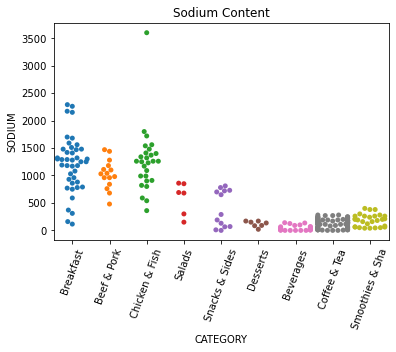

In [15]:
plot = sns.swarmplot(x="CATEGORY", y="SODIUM", data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title("Sodium Content")
plt.show()

In [16]:
df["SODIUM"].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: SODIUM, dtype: float64

In [17]:
df["SODIUM"].idxmax()

82

In [18]:
df.at[82, "ITEM_NAME"]

'Chicken McNuggets (40 piece)'

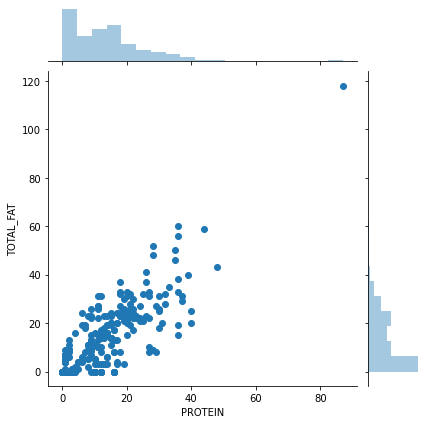

In [21]:
plot = sns.jointplot(x="PROTEIN", y="TOTAL_FAT", data=df)

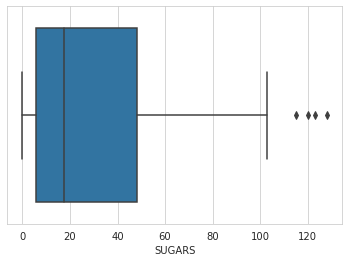

In [23]:
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["SUGARS"])